In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Flatten,BatchNormalization, Conv2D , MaxPool2D , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import sklearn



In [2]:
os.chdir('/Users/mohammedshabo/desktop/final_dataset/')
if os.path.isdir('train/0') is False:
    os.makedirs('train/0')
    os.makedirs('train/1')
    
    os.makedirs('valid/0')
    os.makedirs('valid/1')

    os.makedirs('test/0')
    os.makedirs('test/1')
 

    
    
    for c in random.sample(glob.glob('COVID*'),2531):
        shutil.move(c, 'train/1' )
    for c in random.sample(glob.glob('Normal*'),2531):
        shutil.move(c,'train/0')
   
    for c in random.sample(glob.glob('COVID*'),723):
        shutil.move(c,'valid/1')
    for c in random.sample(glob.glob('Normal*'),723):
        shutil.move(c,'valid/0')
         
    for c in random.sample(glob.glob('COVID*'),361):
        shutil.move(c,'test/1')
    for c in random.sample(glob.glob('Normal*'),361):
        shutil.move(c,'test/0')
 
    

In [4]:
os.chdir('../../')
train_path = '/Users/mohammedshabo/desktop/final_dataset/train/'
valid_path = '/Users/mohammedshabo/desktop/final_dataset/valid/'
test_path = '/Users/mohammedshabo/desktop/final_dataset/test/'
test_path2 = '/users/mohammedshabo/desktop/test2/'

In [5]:
 
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input, horizontal_flip = True, rotation_range =15,zoom_range=0.1,shear_range = 0.15,).flow_from_directory(directory=train_path, target_size=(224,224), classes=['0','1'] , shuffle = True,batch_size=8)
     
validation_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['0','1'], shuffle = True)

                                                                                                                                      
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['0','1'],shuffle = False)
    
resnet_test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['0','1'],shuffle = False)
    
inception_test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input).flow_from_directory(directory=test_path, target_size=(299,299), classes=['0','1'],shuffle = False)
    

Found 5062 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.
Found 722 images belonging to 2 classes.
Found 722 images belonging to 2 classes.
Found 722 images belonging to 2 classes.


In [7]:
train_batches.batch_size

8

In [31]:
images , labels = next(train_batches)

In [32]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize = (20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
        plt.tight_layout()
        plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


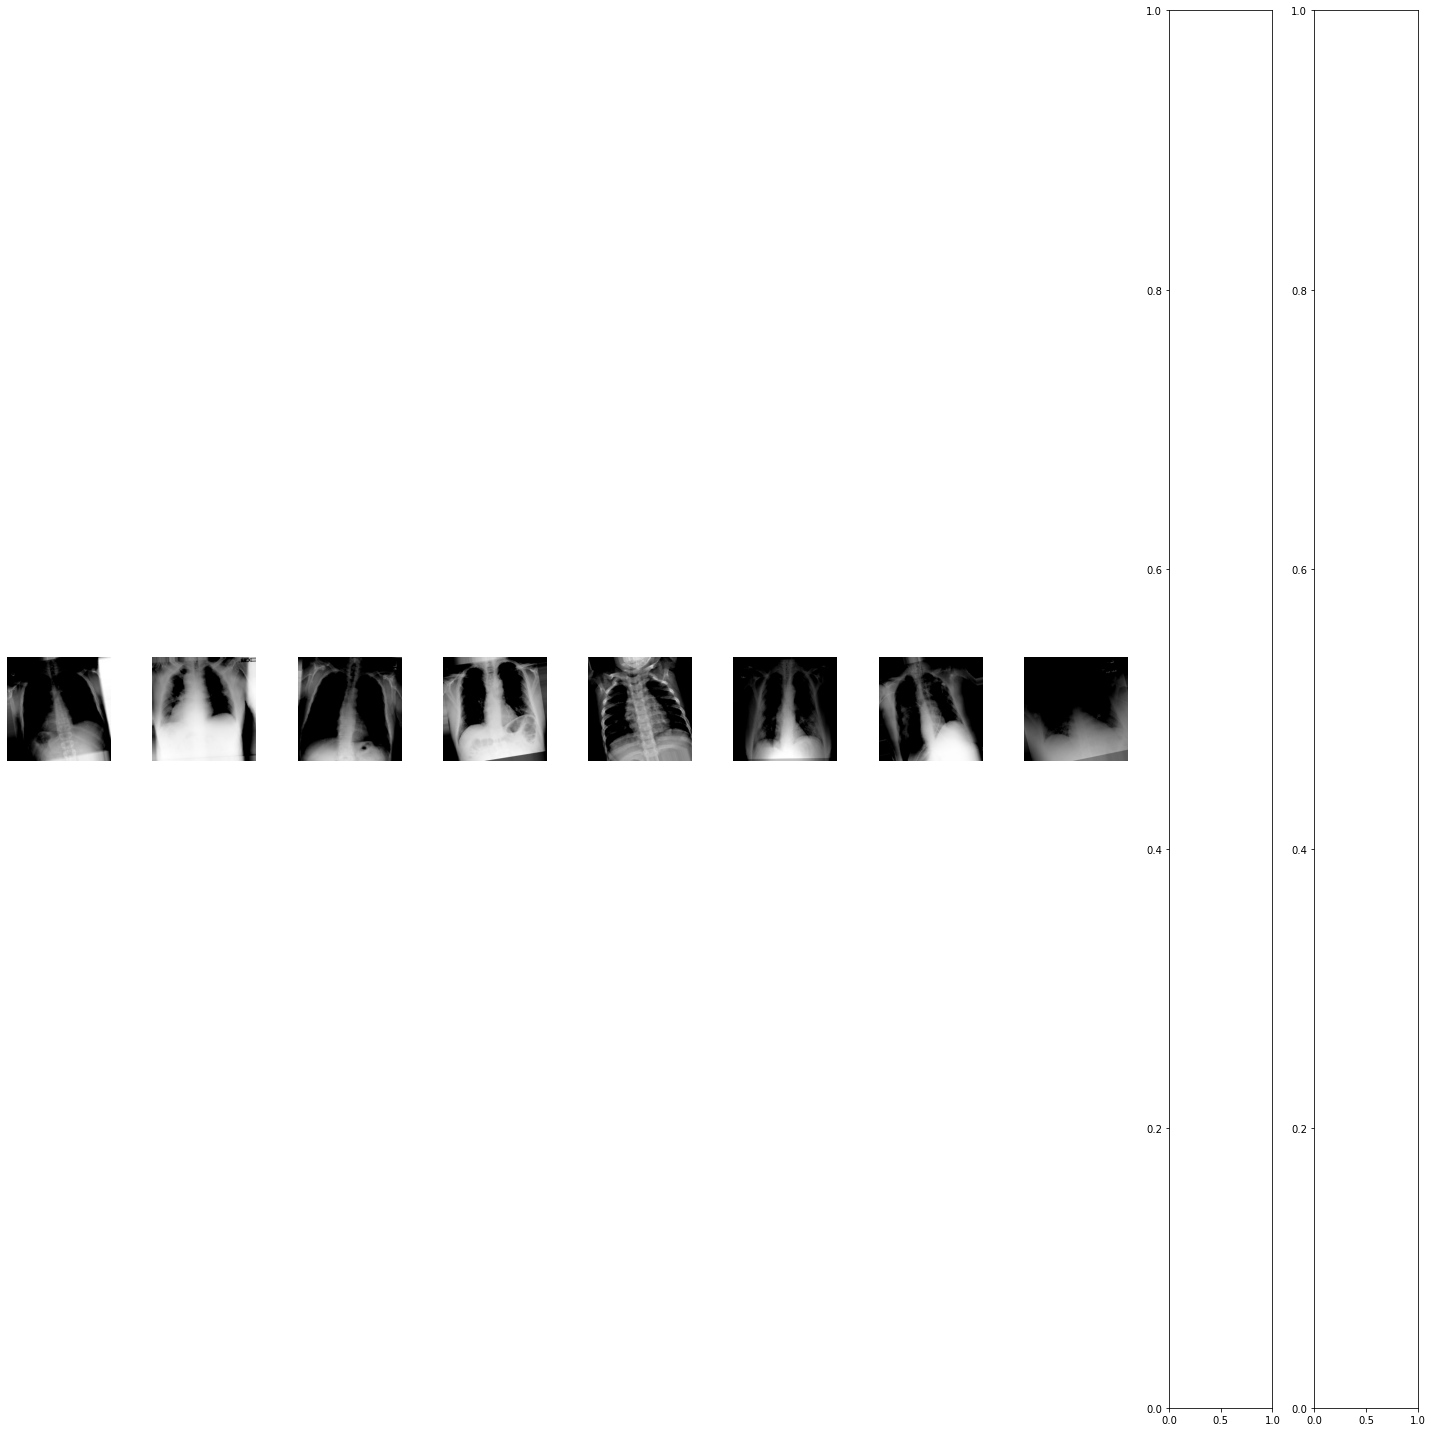

In [33]:
plotImages(images)
print(labels)

In [27]:
mobile_model = tf.keras.applications.mobilenet_v2.MobileNetV2()

In [28]:
mobile_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [18]:
x = mobile_model.layers[-2].output

In [20]:
q = Dropout(0.25)(x)
z = BatchNormalization()(q)
m = Dropout(0.25)(z)
c = Dense(units=1024,activation='relu')(m)
o = Dense(units = 2, activation = 'sigmoid')(c)

model = tf.keras.models.Model(inputs = mobile_model.input , outputs = o)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [23]:
for layer in mobile_model.layers[:-26] :
    layer.trainable = False

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [25]:
checkpoint_filepath = '/Users/mohammedshabo/Desktop/sai2/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [26]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001) , loss = 'binary_crossentropy', metrics = ['accuracy','Precision','Recall','AUC'])

In [34]:
history = model.fit(x = train_batches , validation_data = validation_batches , epochs = 80, callbacks=model_checkpoint_callback)

Epoch 1/80


2022-03-30 18:15:40.556664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


633/633 [==============================] - ETA: 0s - loss: 0.4967 - accuracy: 0.7734 - precision: 0.7620 - recall: 0.7414 - auc: 0.8378

2022-03-30 18:16:16.926094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


633/633 [==============================] - 44s 67ms/step - loss: 0.4967 - accuracy: 0.7734 - precision: 0.7620 - recall: 0.7414 - auc: 0.8378 - val_loss: 0.3553 - val_accuracy: 0.8541 - val_precision: 0.8438 - val_recall: 0.8444 - val_auc: 0.9233
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/80
633/633 [==============================] - 46s 73ms/step - loss: 0.3679 - accuracy: 0.8394 - precision: 0.8334 - recall: 0.8309 - auc: 0.9158 - val_loss: 0.2782 - val_accuracy: 0.8914 - val_precision: 0.8895 - val_recall: 0.8797 - val_auc: 0.9540
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/80
633/633 [==============================] - 48s 76ms/step - loss: 0.3214 - accuracy: 0.8674 - precision: 0.8641 - recall: 0.8593 - auc: 0.9366 - val_loss: 0.2392 - val_accuracy: 0.9094 - val_precision: 0.9027 - val_recall: 0.8983 - val_auc: 0.9656
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/80
633/633 [==============================] - 50s 79ms/step - loss: 0.2707 - accuracy: 0.8882 - precision: 0.8866 - recall: 0.8866 - auc: 0.9555 - val_loss: 0.1988 - val_accuracy: 0.9281 - val_precision: 0.9184 - val_recall: 0.9267 - val_auc: 0.9761
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/80
633/633 [==============================] - 50s 79ms/step - loss: 0.2527 - accuracy: 0.8985 - precision: 0.8971 - recall: 0.8959 - auc: 0.9611 - val_loss: 0.1756 - val_accuracy: 0.9385 - val_precision: 0.9359 - val_recall: 0.9385 - val_auc: 0.9819
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/80
633/633 [==============================] - 51s 80ms/step - loss: 0.2283 - accuracy: 0.9040 - precision: 0.9012 - recall: 0.9026 - auc: 0.9683 - val_loss: 0.1642 - val_accuracy: 0.9440 - val_precision: 0.9404 - val_recall: 0.9385 - val_auc: 0.9839
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 7/80
633/633 [==============================] - 52s 82ms/step - loss: 0.2216 - accuracy: 0.9077 - precision: 0.9059 - recall: 0.9036 - auc: 0.9703 - val_loss: 0.1469 - val_accuracy: 0.9419 - val_precision: 0.9479 - val_recall: 0.9433 - val_auc: 0.9871
Epoch 8/80
633/633 [==============================] - 52s 82ms/step - loss: 0.2123 - accuracy: 0.9156 - precision: 0.9128 - recall: 0.9125 - auc: 0.9724 - val_loss: 0.1328 - val_accuracy: 0.9557 - val_precision: 0.9555 - val_recall: 0.9502 - val_auc: 0.9898
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 9/80
633/633 [==============================] - 52s 82ms/step - loss: 0.2009 - accuracy: 0.9222 - precision: 0.9186 - recall: 0.9202 - auc: 0.9751 - val_loss: 0.1272 - val_accuracy: 0.9550 - val_precision: 0.9563 - val_recall: 0.9544 - val_auc: 0.9901
Epoch 10/80
633/633 [==============================] - 53s 83ms/step - loss: 0.1756 - accuracy: 0.9318 - precision: 0.9293 - recall: 0.9303 - auc: 0.9812 - val_loss: 0.1251 - val_accuracy: 0.9557 - val_precision: 0.9563 - val_recall: 0.9530 - val_auc: 0.9901
Epoch 11/80
633/633 [==============================] - 53s 83ms/step - loss: 0.1880 - accuracy: 0.9245 - precision: 0.9232 - recall: 0.9243 - auc: 0.9784 - val_loss: 0.1176 - val_accuracy: 0.9633 - val_precision: 0.9652 - val_recall: 0.9599 - val_auc: 0.9913
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 12/80
633/633 [==============================] - 52s 81ms/step - loss: 0.1798 - accuracy: 0.9265 - precision: 0.9227 - recall: 0.9271 - auc: 0.9803 - val_loss: 0.1076 - val_accuracy: 0.9661 - val_precision: 0.9680 - val_recall: 0.9627 - val_auc: 0.9928
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 13/80
633/633 [==============================] - 53s 84ms/step - loss: 0.1664 - accuracy: 0.9338 - precision: 0.9317 - recall: 0.9303 - auc: 0.9832 - val_loss: 0.1000 - val_accuracy: 0.9696 - val_precision: 0.9683 - val_recall: 0.9703 - val_auc: 0.9935
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 14/80
633/633 [==============================] - 54s 86ms/step - loss: 0.1464 - accuracy: 0.9437 - precision: 0.9399 - recall: 0.9415 - auc: 0.9872 - val_loss: 0.0927 - val_accuracy: 0.9723 - val_precision: 0.9716 - val_recall: 0.9716 - val_auc: 0.9942
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 15/80
633/633 [==============================] - 58s 92ms/step - loss: 0.1606 - accuracy: 0.9382 - precision: 0.9346 - recall: 0.9376 - auc: 0.9840 - val_loss: 0.0946 - val_accuracy: 0.9716 - val_precision: 0.9717 - val_recall: 0.9723 - val_auc: 0.9941
Epoch 16/80
633/633 [==============================] - 66s 104ms/step - loss: 0.1519 - accuracy: 0.9425 - precision: 0.9425 - recall: 0.9415 - auc: 0.9853 - val_loss: 0.0972 - val_accuracy: 0.9682 - val_precision: 0.9709 - val_recall: 0.9689 - val_auc: 0.9933
Epoch 17/80
633/633 [==============================] - 70s 110ms/step - loss: 0.1342 - accuracy: 0.9516 - precision: 0.9511 - recall: 0.9484 - auc: 0.9890 - val_loss: 0.0998 - val_accuracy: 0.9716 - val_precision: 0.9695 - val_recall: 0.9661 - val_auc: 0.9925
Epoch 18/80
633/633 [==============================] - 74s 117ms/step - loss: 0.1352 - accuracy: 0.9508 - precision: 0.9502 - recall: 0.9504 - auc: 0.9885 - val_loss: 0.0889 - val_accuracy: 0.9751 - val_precision: 0.9730 

/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 19/80
633/633 [==============================] - 76s 120ms/step - loss: 0.1426 - accuracy: 0.9431 - precision: 0.9449 - recall: 0.9447 - auc: 0.9874 - val_loss: 0.0849 - val_accuracy: 0.9723 - val_precision: 0.9744 - val_recall: 0.9737 - val_auc: 0.9949
Epoch 20/80
633/633 [==============================] - 80s 126ms/step - loss: 0.1311 - accuracy: 0.9504 - precision: 0.9498 - recall: 0.9494 - auc: 0.9890 - val_loss: 0.0913 - val_accuracy: 0.9682 - val_precision: 0.9668 - val_recall: 0.9675 - val_auc: 0.9946
Epoch 21/80
633/633 [==============================] - 83s 130ms/step - loss: 0.1208 - accuracy: 0.9552 - precision: 0.9530 - recall: 0.9540 - auc: 0.9909 - val_loss: 0.0844 - val_accuracy: 0.9744 - val_precision: 0.9723 - val_recall: 0.9723 - val_auc: 0.9951
Epoch 22/80
633/633 [==============================] - 83s 131ms/step - loss: 0.1347 - accuracy: 0.9498 - precision: 0.9501 - recall: 0.9488 - auc: 0.9886 - val_loss: 0.0790 - val_accuracy: 0.9779 - val_precision: 0.9785

/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 23/80
633/633 [==============================] - 82s 129ms/step - loss: 0.1153 - accuracy: 0.9561 - precision: 0.9571 - recall: 0.9567 - auc: 0.9919 - val_loss: 0.0927 - val_accuracy: 0.9730 - val_precision: 0.9737 - val_recall: 0.9723 - val_auc: 0.9935
Epoch 24/80
633/633 [==============================] - 84s 132ms/step - loss: 0.1239 - accuracy: 0.9510 - precision: 0.9497 - recall: 0.9506 - auc: 0.9906 - val_loss: 0.0849 - val_accuracy: 0.9703 - val_precision: 0.9730 - val_recall: 0.9710 - val_auc: 0.9952
Epoch 25/80
633/633 [==============================] - 84s 133ms/step - loss: 0.1141 - accuracy: 0.9599 - precision: 0.9589 - recall: 0.9575 - auc: 0.9919 - val_loss: 0.0848 - val_accuracy: 0.9723 - val_precision: 0.9696 - val_recall: 0.9703 - val_auc: 0.9951
Epoch 26/80
633/633 [==============================] - 83s 131ms/step - loss: 0.0943 - accuracy: 0.9640 - precision: 0.9642 - recall: 0.9638 - auc: 0.9946 - val_loss: 0.0705 - val_accuracy: 0.9765 - val_precision: 0.9765

/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 35/80
633/633 [==============================] - 80s 126ms/step - loss: 0.0801 - accuracy: 0.9702 - precision: 0.9686 - recall: 0.9696 - auc: 0.9962 - val_loss: 0.0703 - val_accuracy: 0.9765 - val_precision: 0.9779 - val_recall: 0.9793 - val_auc: 0.9963
Epoch 36/80
633/633 [==============================] - 80s 127ms/step - loss: 0.0852 - accuracy: 0.9658 - precision: 0.9668 - recall: 0.9670 - auc: 0.9955 - val_loss: 0.0671 - val_accuracy: 0.9793 - val_precision: 0.9793 - val_recall: 0.9806 - val_auc: 0.9964
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 37/80
633/633 [==============================] - 80s 126ms/step - loss: 0.0677 - accuracy: 0.9751 - precision: 0.9741 - recall: 0.9745 - auc: 0.9971 - val_loss: 0.0693 - val_accuracy: 0.9772 - val_precision: 0.9752 - val_recall: 0.9786 - val_auc: 0.9964
Epoch 38/80
633/633 [==============================] - 82s 129ms/step - loss: 0.0780 - accuracy: 0.9712 - precision: 0.9708 - recall: 0.9714 - auc: 0.9963 - val_loss: 0.0668 - val_accuracy: 0.9779 - val_precision: 0.9786 - val_recall: 0.9799 - val_auc: 0.9968
Epoch 39/80
633/633 [==============================] - 81s 128ms/step - loss: 0.0685 - accuracy: 0.9751 - precision: 0.9757 - recall: 0.9741 - auc: 0.9968 - val_loss: 0.0670 - val_accuracy: 0.9806 - val_precision: 0.9799 - val_recall: 0.9799 - val_auc: 0.9966
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 40/80
633/633 [==============================] - 77s 122ms/step - loss: 0.0731 - accuracy: 0.9731 - precision: 0.9712 - recall: 0.9718 - auc: 0.9964 - val_loss: 0.0752 - val_accuracy: 0.9751 - val_precision: 0.9758 - val_recall: 0.9751 - val_auc: 0.9961
Epoch 41/80
633/633 [==============================] - 74s 117ms/step - loss: 0.0723 - accuracy: 0.9759 - precision: 0.9760 - recall: 0.9735 - auc: 0.9966 - val_loss: 0.0603 - val_accuracy: 0.9827 - val_precision: 0.9807 - val_recall: 0.9834 - val_auc: 0.9973
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 42/80
633/633 [==============================] - 75s 118ms/step - loss: 0.0737 - accuracy: 0.9725 - precision: 0.9733 - recall: 0.9723 - auc: 0.9966 - val_loss: 0.0696 - val_accuracy: 0.9737 - val_precision: 0.9738 - val_recall: 0.9772 - val_auc: 0.9964
Epoch 43/80
633/633 [==============================] - 77s 122ms/step - loss: 0.0687 - accuracy: 0.9757 - precision: 0.9745 - recall: 0.9753 - auc: 0.9970 - val_loss: 0.0594 - val_accuracy: 0.9855 - val_precision: 0.9834 - val_recall: 0.9841 - val_auc: 0.9967
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/sai2/assets


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 44/80
633/633 [==============================] - 77s 121ms/step - loss: 0.0685 - accuracy: 0.9757 - precision: 0.9749 - recall: 0.9745 - auc: 0.9967 - val_loss: 0.0645 - val_accuracy: 0.9813 - val_precision: 0.9780 - val_recall: 0.9820 - val_auc: 0.9964
Epoch 45/80
633/633 [==============================] - 78s 124ms/step - loss: 0.0580 - accuracy: 0.9802 - precision: 0.9807 - recall: 0.9812 - auc: 0.9980 - val_loss: 0.0589 - val_accuracy: 0.9806 - val_precision: 0.9813 - val_recall: 0.9806 - val_auc: 0.9973
Epoch 46/80
633/633 [==============================] - 80s 126ms/step - loss: 0.0593 - accuracy: 0.9777 - precision: 0.9769 - recall: 0.9773 - auc: 0.9980 - val_loss: 0.0587 - val_accuracy: 0.9827 - val_precision: 0.9827 - val_recall: 0.9834 - val_auc: 0.9972
Epoch 47/80
633/633 [==============================] - 80s 127ms/step - loss: 0.0660 - accuracy: 0.9767 - precision: 0.9771 - recall: 0.9759 - auc: 0.9970 - val_loss: 0.0583 - val_accuracy: 0.9813 - val_precision: 0.9827

Text(0.5, 0, 'epoch')

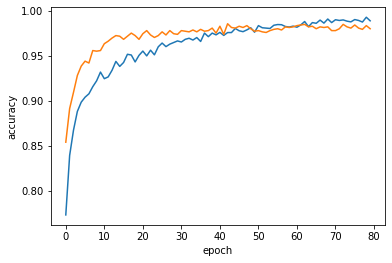

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

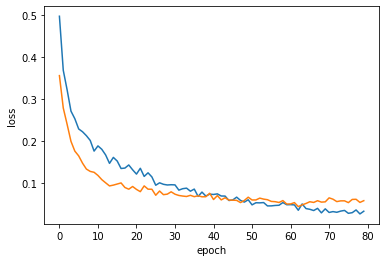

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [37]:
hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/users/mohammedshabo/desktop/sai2/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [38]:

pd.read_csv('/users/mohammedshabo/desktop/sai2/history.csv')

,Unnamed: 0,loss,accuracy,precision,recall,auc,val_loss,val_accuracy,val_precision,val_recall,val_auc
0,0,0.496661,0.773410,0.762030,0.741407,0.837776,0.355300,0.854080,0.843815,0.844398,0.923326
1,1,0.367945,0.839392,0.833366,0.830897,0.915757,0.278195,0.891425,0.889511,0.879668,0.954045
2,2,0.321364,0.867444,0.864124,0.859344,0.936571,0.239230,0.909405,0.902710,0.898340,0.965583
3,3,0.270716,0.888187,0.886606,0.886606,0.955515,0.198822,0.928077,0.918437,0.926694,0.976122
4,4,0.252712,0.898459,0.897132,0.895891,0.961090,0.175580,0.938451,0.935862,0.938451,0.981949
...,...,...,...,...,...,...,...,...,...,...,...
75,75,0.027471,0.990122,0.989532,0.989727,0.999592,0.052958,0.984094,0.983414,0.984094,0.997895
76,76,0.028986,0.989135,0.989532,0.989727,0.999489,0.060512,0.980636,0.977273,0.981328,0.996948
77,77,0.035479,0.987357,0.988338,0.987752,0.998895,0.060857,0.979253,0.979903,0.977870,0.997110
78,78,0.026033,0.992691,0.991515,0.992691,0.999510,0.053412,0.983402,0.982747,0.984786,0.997869


In [50]:
model.('/users/mohammedshabo/desktop/m98v_80e_b.h5')

In [5]:
neyz = tf.keras.models.load_model('/users/mohammedshabo/desktop/sai2')

Metal device set to: Apple M1


2022-04-23 03:35:32.160468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-23 03:35:32.160784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [76]:
clone = tf.keras.applications.mobilenet_v2.MobileNetV2()

In [9]:
test_loss, test_acc = neyz.evaluate(test_batches)
print(test_acc,test_loss)

2022-04-23 03:37:25.370799: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-23 03:37:25.586009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - 17s 135ms/step - loss: 0.0473 - accuracy: 0.9845 - precision: 0.9842 - recall: 0.9855 - auc: 0.9983


ValueError: too many values to unpack (expected 2)

In [58]:
confusion_matrix = sklearn.metrics.confusion_matrix(my_list,ensemble_prediction)

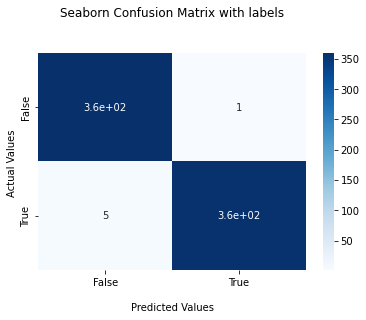

In [59]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
inception = tf.keras.models.load_model('/Users/mohammedshabo/Desktop/inception_model')
#best_mobile = tf.keras.models.load_model('/users/mohammedshabo/desktop/corona_models/m98v_80e_b/m98v_80e_b.h5')
sai2 = tf.keras.models.load_model('/users/mohammedshabo/desktop/sai2')
resnet = tf.keras.models.load_model('/users/mohammedshabo/desktop/corona_models/resnet_model')

In [32]:
models = [ saaai ,best_mobile , sai2 ]

In [33]:
preds = [model.predict(test_batches) for model in models]

In [41]:
preds 

array([[[9.9998760e-01, 7.3005504e-07],
        [9.9908102e-01, 4.6076532e-04],
        [9.9993360e-01, 9.4155694e-05],
        ...,
        [8.1415079e-09, 1.0000000e+00],
        [3.7269206e-08, 9.9999988e-01],
        [7.8896956e-06, 9.9999714e-01]],

       [[1.0000000e+00, 7.0074565e-21],
        [1.0000000e+00, 1.9986744e-12],
        [1.0000000e+00, 2.6595346e-13],
        ...,
        [3.3294649e-25, 1.0000000e+00],
        [3.4263631e-26, 1.0000000e+00],
        [1.0533052e-02, 9.8807019e-01]],

       [[9.9972552e-01, 4.1234100e-04],
        [9.8497552e-01, 2.1572802e-02],
        [9.9014837e-01, 1.4183337e-02],
        ...,
        [3.3626950e-06, 9.9999833e-01],
        [3.6883150e-05, 9.9993658e-01],
        [2.6545623e-02, 9.6120006e-01]]], dtype=float32)

In [39]:
preds = np.array(preds)

In [40]:
preds.shape

(3, 722, 2)

In [35]:
inception_preds = inception.predict(inception_test_batches)

2022-04-01 18:13:36.065403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [36]:
inception_preds


array([[1.0000000e+00, 6.6504962e-09],
       [9.5706785e-01, 4.4497900e-02],
       [9.9922562e-01, 7.5497373e-04],
       ...,
       [3.9917143e-15, 1.0000000e+00],
       [6.5648713e-15, 1.0000000e+00],
       [2.5033974e-05, 9.9997747e-01]], dtype=float32)

In [37]:
inception_results = np.argmax(inception_preds , axis =1)

In [38]:
inception_results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [33]:
resnet_preds = resnet.predict(resnet_test_batches)

2022-04-01 18:12:19.852813: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-01 18:12:20.016412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [39]:
resnet_preds

array([[9.9919468e-01, 6.2701001e-04],
       [9.5161188e-01, 5.2248809e-02],
       [9.9635881e-01, 4.3481649e-03],
       ...,
       [1.7474601e-06, 9.9999762e-01],
       [2.8023556e-05, 9.9994791e-01],
       [8.6640358e-02, 9.0847909e-01]], dtype=float32)

In [40]:
resnet_results = np.argmax(resnet_preds,axis = 1)

In [41]:
resnet_results

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [42]:
mobile_preds = sai2.predict(test_batches)

2022-04-01 18:16:28.043865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [43]:
mobile_results = np.argmax(mobile_preds, axis =1)

In [52]:
results = np.append(mobile_results,resnet_results,axis =0) 

In [53]:
results = np.append(results , inception_results , axis =0)

(1444,)

In [51]:
arr = np.append(arr , [mobile_results],axis = 0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 722

In [42]:
combined_preds = np.append(preds , [resnet_preds] , axis = 0)

In [43]:
combined_preds.shape

(4, 722, 2)

In [44]:
summed = np.sum(preds , axis = 0)

In [45]:
summed.shape

(722, 2)

In [46]:
ensemble_prediction = np.argmax(summed,axis=1)

In [47]:
ensemble_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
my_list = []
print(my_list)

[]


In [49]:

x = range(722)
for i in x:
    if i <361:
        my_list.append(0) 
    else:
        my_list.append(1)
 

In [50]:
for i in ensemble_prediction:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [67]:
e_accuracy = sklearn.metrics.accuracy_score(my_list, resnet_results)

In [68]:
print(e_accuracy)

0.9626038781163435


In [69]:
sklearn.metrics.recall_score(my_list, resnet_results)


0.9501385041551247

In [70]:
sklearn.metrics.precision_score(my_list, resnet_results)

0.9744318181818182

In [28]:
test_loss, test_acc =neyz.evaluate(test_batches)
print(test_acc,test_loss)

23/23 [==============================] - 3s 133ms/step - loss: 0.1066 - accuracy: 0.9834 - precision: 0.9833 - recall: 0.9806 - auc: 0.9910


ValueError: too many values to unpack (expected 2)

In [39]:
weights = [0.3,0.3,.4]

weighted_ensemble = np.tensordot(preds , weights, axes = ((0),(0)))

In [40]:
weighted_preds = np.argmax(weighted_ensemble, axis =1)

In [41]:
sklearn.metrics.precision_score(my_list,weighted_preds)

0.9943820224719101

In [42]:
sklearn.metrics.recall_score(my_list, ensemble_prediction)


0.9806094182825484

In [43]:
sklearn.metrics.accuracy_score(my_list,ensemble_prediction)

0.9875346260387812